In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [0]:
if tf.keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1],x_train.shape[2])
    x_test = x_test.reshape(x_test.shape[0], 1, x_train.shape[1],x_train.shape[2])
    input_shape = (1, x_train.shape[1],x_train.shape[2])
else:
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],x_train.shape[2], 1)
    x_test = x_test.reshape(x_test.shape[0], x_train.shape[1],x_train.shape[2], 1)
    input_shape = (x_train.shape[1],x_train.shape[2], 1)

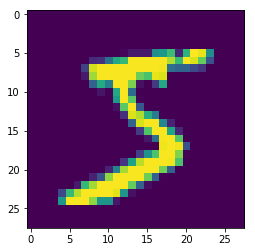

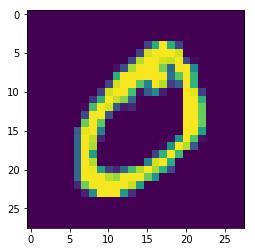

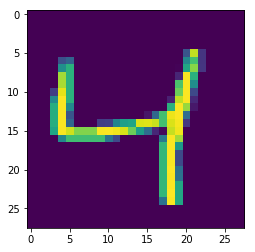

In [0]:
for i in range(3):
    plt.imshow(x_train[i].reshape(28,28))
    plt.show()

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [0]:
model=tf.keras.models.Sequential()
##Hidden Layers with activation function RELU and size 16
model.add(tf.keras.layers.Conv2D(32,(5,5),input_shape=input_shape,activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(tf.keras.layers.Conv2D(32,(2,2),activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
##Output Layer with activation softmax and size 10 for 10 digits recognition
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 36s 606us/sample - loss: 0.2232 - accuracy: 0.9316
Epoch 2/10
60000/60000 [==============================] - 36s 607us/sample - loss: 0.0782 - accuracy: 0.9758
Epoch 3/10
60000/60000 [==============================] - 36s 602us/sample - loss: 0.0596 - accuracy: 0.9813
Epoch 4/10
60000/60000 [==============================] - 36s 604us/sample - loss: 0.0480 - accuracy: 0.9847
Epoch 5/10
60000/60000 [==============================] - 38s 626us/sample - loss: 0.0432 - accuracy: 0.9862
Epoch 6/10
60000/60000 [==============================] - 38s 639us/sample - loss: 0.0376 - accuracy: 0.9880
Epoch 7/10
60000/60000 [==============================] - 36s 597us/sample - loss: 0.0325 - accuracy: 0.9896
Epoch 8/10
60000/60000 [==============================] - 36s 607us/sample - loss: 0.0307 - accuracy: 0.9902
Epoch 9/10
60000/60000 [==============================] - 36s 605us/sample - loss: 0.0283 - accuracy: 0.9911
Epoch 10/10
60000/6

In [0]:
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 2s 244us/sample - loss: 0.0213 - accuracy: 0.9939
0.021331036648963346
0.9939


In [0]:
prediction=model.predict(x_test)

[4.72098249e-10 3.07094927e-09 4.68298913e-06 2.16135962e-08
 1.17090392e-13 5.80817394e-09 9.23680495e-17 9.99995351e-01
 2.22822732e-10 1.45665595e-08]
7


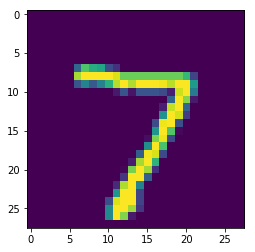

[8.5752495e-11 6.2075905e-08 9.9999988e-01 1.5857654e-11 5.1409410e-10
 1.2021201e-13 1.2006515e-09 1.6891939e-12 9.0187992e-13 1.9134421e-13]
2


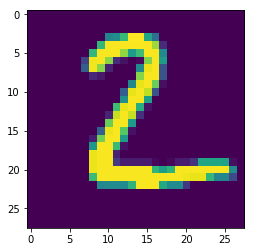

[3.1737716e-08 9.9999845e-01 1.8780705e-07 3.5645137e-10 8.7944392e-07
 1.3715460e-07 1.0076188e-07 2.5402247e-07 1.2714915e-08 5.1824829e-09]
1


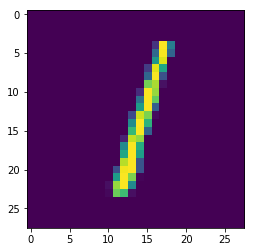

[9.9999475e-01 8.0191157e-14 7.1541084e-10 5.4299815e-10 2.9075560e-11
 1.8684611e-07 4.1230724e-06 2.8440065e-12 1.3993926e-09 7.8956469e-07]
0


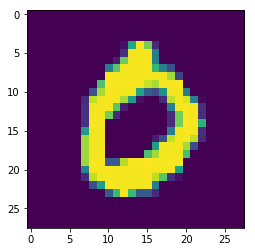

[4.1616331e-13 7.0042028e-10 9.7833183e-12 9.0464637e-13 9.9997270e-01
 2.3970310e-11 2.1092151e-12 2.0696420e-09 1.2515734e-10 2.7306565e-05]
4


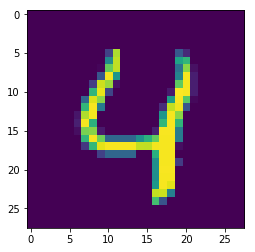

[1.9020499e-08 9.9999952e-01 5.8758591e-08 1.4363731e-11 2.8042569e-08
 1.0072500e-09 1.8098454e-09 3.6831767e-07 1.6706757e-09 9.0628505e-10]
1


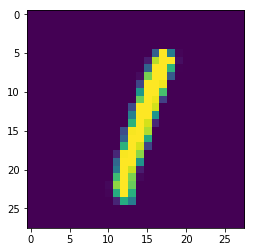

[8.9574642e-14 7.6414487e-08 6.7379169e-10 1.0993527e-08 9.9998188e-01
 4.3794729e-10 2.7509486e-13 1.3374722e-05 2.9221560e-06 1.6722810e-06]
4


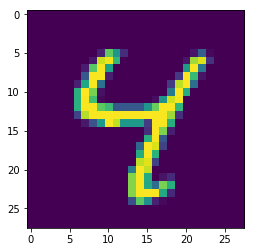

[1.06988451e-09 8.53103188e-07 1.15452316e-07 2.20252400e-06
 8.20247660e-05 8.19905908e-05 7.14302298e-11 1.67953846e-08
 1.88794475e-05 9.99813974e-01]
9


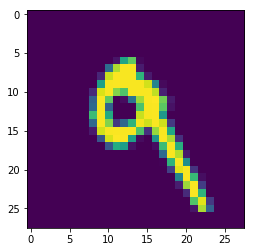

[1.4562059e-08 2.9021933e-08 1.0058506e-08 2.3138422e-09 7.5439266e-07
 9.9848783e-01 1.2843788e-03 1.3175876e-10 1.1054792e-04 1.1648848e-04]
5


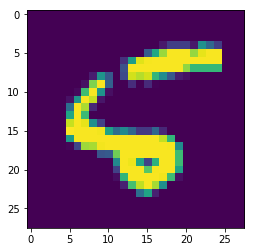

[2.2087565e-16 1.2606138e-12 1.1537326e-12 4.3288995e-09 1.1789338e-05
 1.1755610e-09 2.7587135e-18 3.4024197e-07 1.7221250e-08 9.9998784e-01]
9


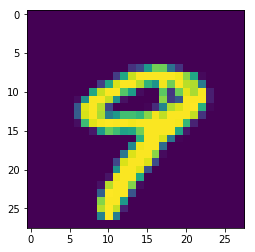

In [0]:
##Showing Handwritten digit image with prediction
for i in range(10):
    plt.imshow(x_test[i].reshape(28,28))
    print(prediction[i])
    num=np.argmax(prediction[i])
    print(num)
    plt.show()

In [0]:
var=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1843137254901961,0.12549019607843137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3137254901960784,1,1,1,0.6078431372549019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.7294117647058823,1,1,1,1,0.43529411764705883,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5843137254901961,1,1,1,1,0.9372549019607843,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0.7686274509803922,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0.996078431372549,1,1,1,1,1,0.8823529411764706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.09411764705882353,0,0,0,0,0,0.788235294117647,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0.5137254901960784,0,0,0,0,0,0,0,0.13725490196078433,1,1,0.9647058823529412,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.9725490196078431,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0.6392156862745098,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.7686274509803922,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0.807843137254902,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.9333333333333333,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0.3058823529411765,0,0,0,1,1,1,0.9921568627450981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.10588235294117647,1,1,1,1,1,0.9921568627450981,0.2823529411764706,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.996078431372549,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

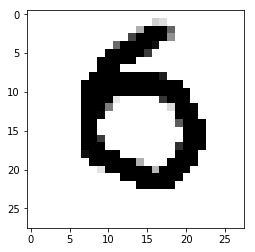

0


In [0]:
variable=np.array(var).reshape(1,28,28)
if tf.keras.backend.image_data_format() == 'channels_first':
    variable = variable.reshape(variable.shape[0], 1, variable.shape[1],variable.shape[2])
else:
    variable = variable.reshape(variable.shape[0], variable.shape[1],variable.shape[2], 1)
plt.imshow(variable.reshape(28,28),cmap='binary')
plt.show()
pred=model.predict(variable)
p=np.argmax(pred)
print(p)

In [0]:
# !pip3 install tensorflowjs 
# !mkdir model
# model.save('conv.h5')
# !ls
# !tensorflowjs_converter --input_format keras \conv.h5 \model
# !zip -r model.zip model 
# !ls -l
# from google.colab import files
# files.download('model.zip')

In [0]:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # 1. Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# # 2. Save Keras Model or weights on google drive
# # create on Colab directory  
# model_str = drive.CreateFile({'title' : 'convDigitRecognition.json'})
# model_str.SetContentFile('convDigitRecognition.json')
# model_file = drive.CreateFile({'title' : 'convDigitRecognition.h5'})
# model_file.SetContentFile('convDigitRecognition.h5')
# model_file.Upload()
# model_str.Upload()

# # download to google drive
# drive.CreateFile({'m_id': model_file.get('id'),'j_id': model_str.get('id')})